In [120]:
%matplotlib inline
import praw, string, nltk, matplotlib.pyplot as plt, networkx as nx
from collections import defaultdict
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wendyw/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [121]:
# Initialize Reddit API
reddit_API = praw.Reddit(
    client_id="SoEONQp0sZRnFXYVqKeiug",
    client_secret="8EHEZ9w1dlLxQQlKyyghQelGvQ-RSQ",
    user_agent="roseytea_",
)

In [122]:
# Subreddit
subreddit = reddit_API.subreddit('applyingtocollege')
applyingtocollege_hot = subreddit.hot(limit=300)

In [123]:
list_words = []
list_unique_words = set()
count_unique_words = {}

for submission in applyingtocollege_hot:
    text = submission.title + submission.selftext
    tokens = TweetTokenizer().tokenize(text)
    tokens_lowercase = [word.lower() for word in tokens]
    list_words.extend(tokens_lowercase)
    
punctuation = string.punctuation + "’"
stop_words = set(stopwords.words('english'))
    
for word in list_words:
    if word not in stop_words and word not in punctuation:
       list_unique_words.add(word)
       
for word in list_unique_words:
    count = list_words.count(word)
    word_count = {word: count}
    count_unique_words.update(word_count)
    
top_20 = sorted(count_unique_words.items(), key=lambda x: x[1], reverse=True)[:20]

for word, count in top_20:
    print(f"{word} : {count}")

school : 206
college : 172
i'm : 128
year : 121
like : 109
get : 107
university : 106
would : 93
really : 91
good : 90
know : 88
one : 87
schools : 81
applying : 77
also : 77
sat : 71
want : 71
gpa : 71
apply : 71
even : 67


In [124]:
list_unique_words = list(list_unique_words)

word_counts = {}

for word in list_words:
    if word not in stop_words and word not in punctuation:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

list_unique_words = sorted(list_unique_words, key=lambda word: word_counts.get(word, 0), reverse=True)

top_20_words = list_unique_words[:20]

for word in top_20_words:
    print(word)

school
college
i'm
year
like
get
university
would
really
good
know
one
schools
applying
also
sat
want
gpa
apply
even


In [125]:
g = nx.Graph()

In [143]:
for word, count in top_20:
    g.add_node(word, label=word)
    
co_occurrence_threshold = 3
co_occurrences = defaultdict(int)

for i in range(len(list_words)):
    if list_words[i] in top_20:
        for j in range(i + 1, len(list_words)):
            if list_words[j] in top_20:
                if list_words[i] != list_words[j]:
                    co_occurrences[(list_words[i], list_words[j])] += 1

for (word1, word2), count in co_occurrences.items():
    if count >= co_occurrence_threshold:
        g.add_edge(word1, word2)

In [144]:
with open('edges.txt', 'w') as f:
    for edge in g.edges:
        f.write(f"{edge}\n")

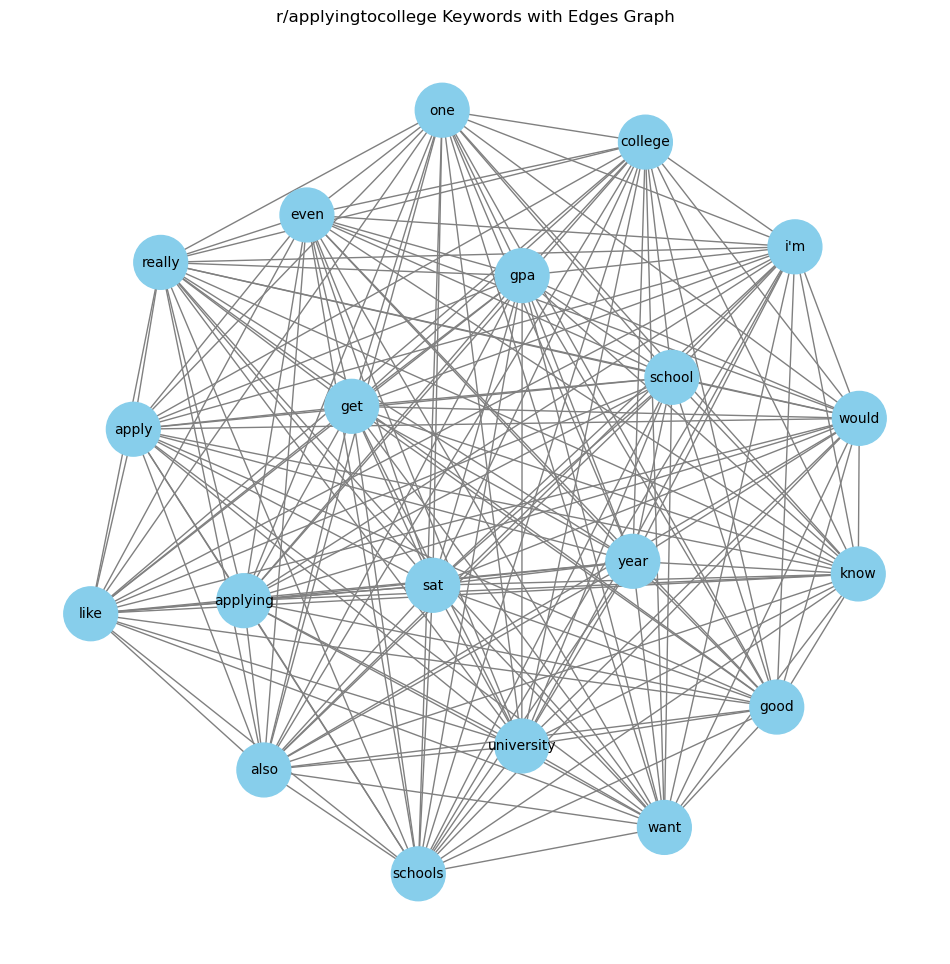

In [145]:
# Visualization
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(g, k=0.2)

degree_centrality = nx.degree_centrality(g)

node_sizes = [1500 * degree_centrality[node] for node in g.nodes]

nx.draw_networkx_nodes(g, pos, node_color='skyblue', node_size=node_sizes)
node_labels = nx.get_node_attributes(g, 'label')
nx.draw_networkx_labels(g, pos, labels=node_labels, font_size=10)
nx.draw_networkx_edges(g, pos, edge_color='gray')

plt.title("r/applyingtocollege Keywords with Edges Graph")
plt.axis('off')
plt.show()